## Line chart

* Построение графика посещений страницы пользователями (не администраторами) с течением времени

#### 1. Подключаемся к базе

In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('../data/checking-logs.sqlite')

#### 2. Выполняем SQL-запрос и загружаем его в датафрейм

In [9]:
query = """
SELECT datetime
FROM pageviews
WHERE uid NOT LIKE 'admin%'
"""
df = pd.read_sql_query(query, conn)

df['datetime'] = pd.to_datetime(df['datetime'])

df['date'] = df['datetime'].dt.date
views_per_day = df.groupby('date').size().reset_index(name='views')

views_per_day.head()

,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1


#### 3. Чертим график

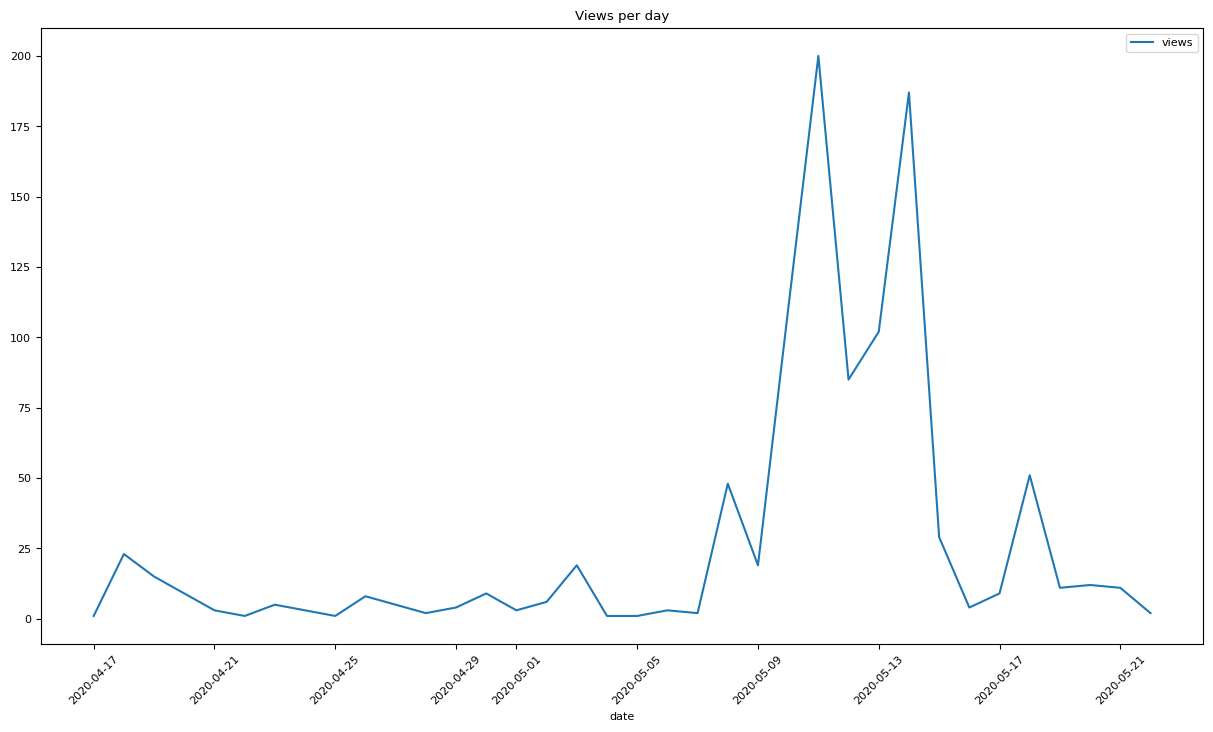

In [10]:
plt.rcParams['font.size'] = 8
views_per_day.plot(x='date', y='views', kind='line', figsize=(15, 8), title='Views per day')

plt.xticks(rotation=45)

plt.show()

In [11]:
conn.close()